<a href="https://colab.research.google.com/github/ricospeloacaso/python_para_investimentos/blob/master/04_Simulando_CARTEIRA_DE_A%C3%87%C3%95ES_e_comparando_com_o_IBOVESPA_Python_para_Investimentos_com_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ricos pelo Acaso

Link para o vídeo: https://youtu.be/TiNLwmLN-iE

# 1. Importando bibliotecas

In [20]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Obtendo e tratando os dados

In [22]:
tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA ^BVSP"

carteira = yf.download(tickers, period="5y")["Adj Close"]

ibov = yf.download("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed


In [23]:
carteira.dropna(inplace=True)
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2018-01-04,18.084837,6.658147,8.905495,29.024485,8.747184,78647.0000
2018-01-05,18.151758,6.669857,8.523104,29.477558,8.783031,79071.0000
2018-01-08,18.118299,6.664000,8.616577,30.132771,8.854730,79379.0000
2018-01-09,18.068110,6.558593,8.710050,30.021244,8.998128,78864.0000
2018-01-10,18.068110,6.558593,8.710050,29.603022,8.926430,78201.0000
...,...,...,...,...,...,...
2022-12-28,14.550000,8.550000,7.160000,88.989998,38.700001,110237.0000
2022-12-29,14.520000,8.510000,7.160000,88.879997,38.509998,110031.0000
2023-01-02,14.190000,8.360000,7.030000,89.400002,38.099998,106376.0000


In [24]:
ibov.dropna(inplace=True)
ibov

Date
2018-01-04     78647.0000
2018-01-05     79071.0000
2018-01-08     79379.0000
2018-01-09     78864.0000
2018-01-10     78201.0000
                 ...     
2022-12-28    110237.0000
2022-12-29    110031.0000
2023-01-02    106376.0000
2023-01-03    104074.0000
2023-01-04    104539.4375
Name: Adj Close, Length: 1239, dtype: float64

# 3. Resultados

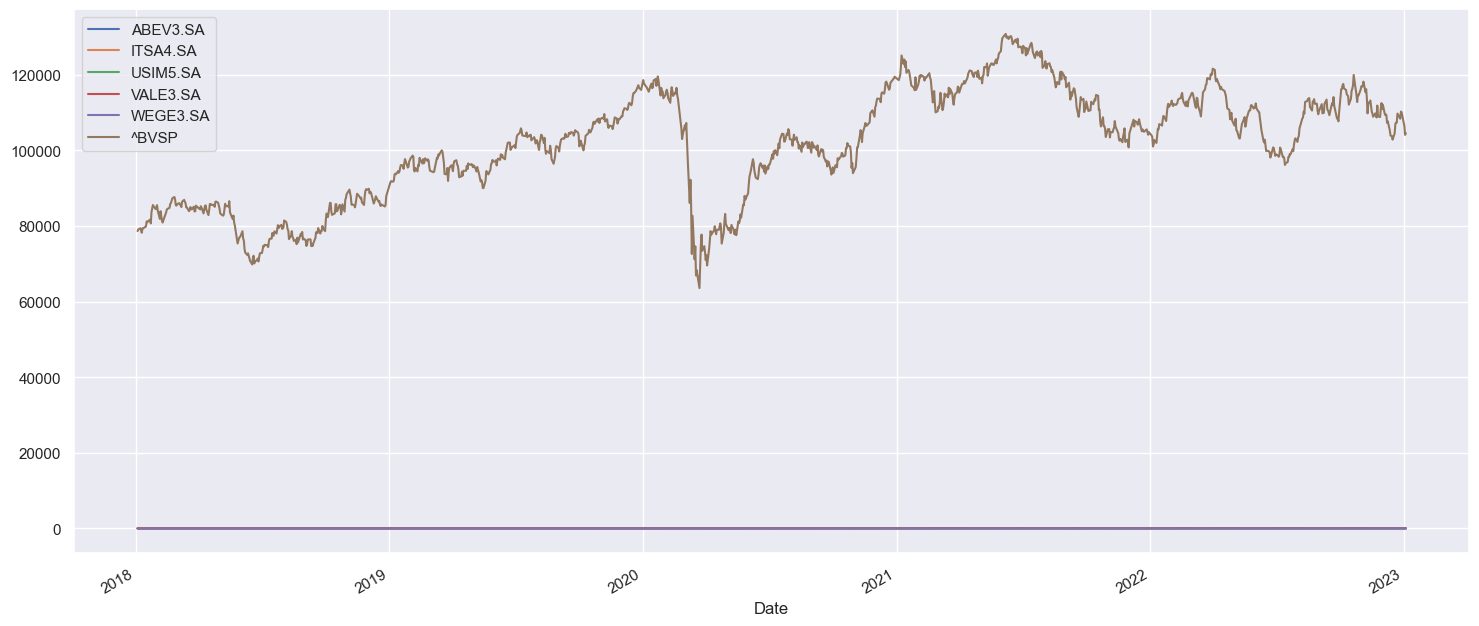

In [25]:
sns.set()
carteira.plot(figsize=(18,8));

In [26]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

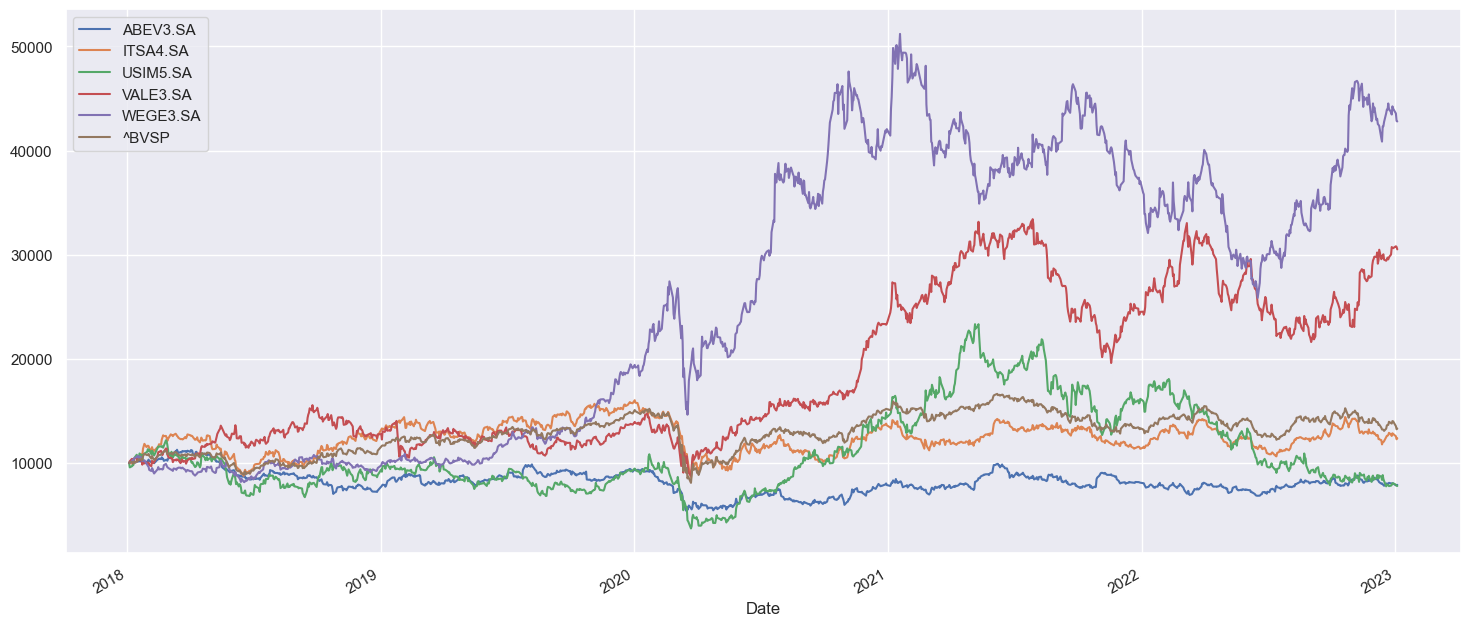

In [27]:
carteira_normalizada.plot(figsize=(18,8));

In [28]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [29]:
carteira_normalizada

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP,saldo
Date,,,,,,,
2018-01-04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,60000.000000
2018-01-05,10037.004057,10017.587727,9570.612314,10156.100447,10040.981949,10053.911783,59876.198277
2018-01-08,10018.503083,10008.790283,9675.573843,10381.845162,10122.949117,10093.074116,60300.735605
2018-01-09,9990.750568,9850.478538,9780.534302,10343.420194,10286.885635,10027.591644,60279.660881
2018-01-10,9990.750568,9850.478538,9780.534302,10199.327221,10204.918466,9943.290907,59969.300003
...,...,...,...,...,...,...,...
2022-12-28,8045.414080,12841.411241,8039.979919,30660.319721,44242.811914,14016.682137,117846.619011
2022-12-29,8028.825745,12781.334522,8039.979919,30622.420475,44025.596356,13990.489148,117488.646163
2023-01-02,7846.351953,12556.045751,7894.003034,30801.581028,43556.874242,13525.754320,116180.610328


In [30]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2018-01-04    50000.000000
2018-01-05    50269.558915
2018-01-08    50465.370580
2018-01-09    50137.958218
2018-01-10    49716.454537
                  ...     
2022-12-28    70083.410683
2022-12-29    69952.445739
2023-01-02    67628.771600
2023-01-03    66165.270131
2023-01-04    66461.173026
Name: Adj Close, Length: 1239, dtype: float64

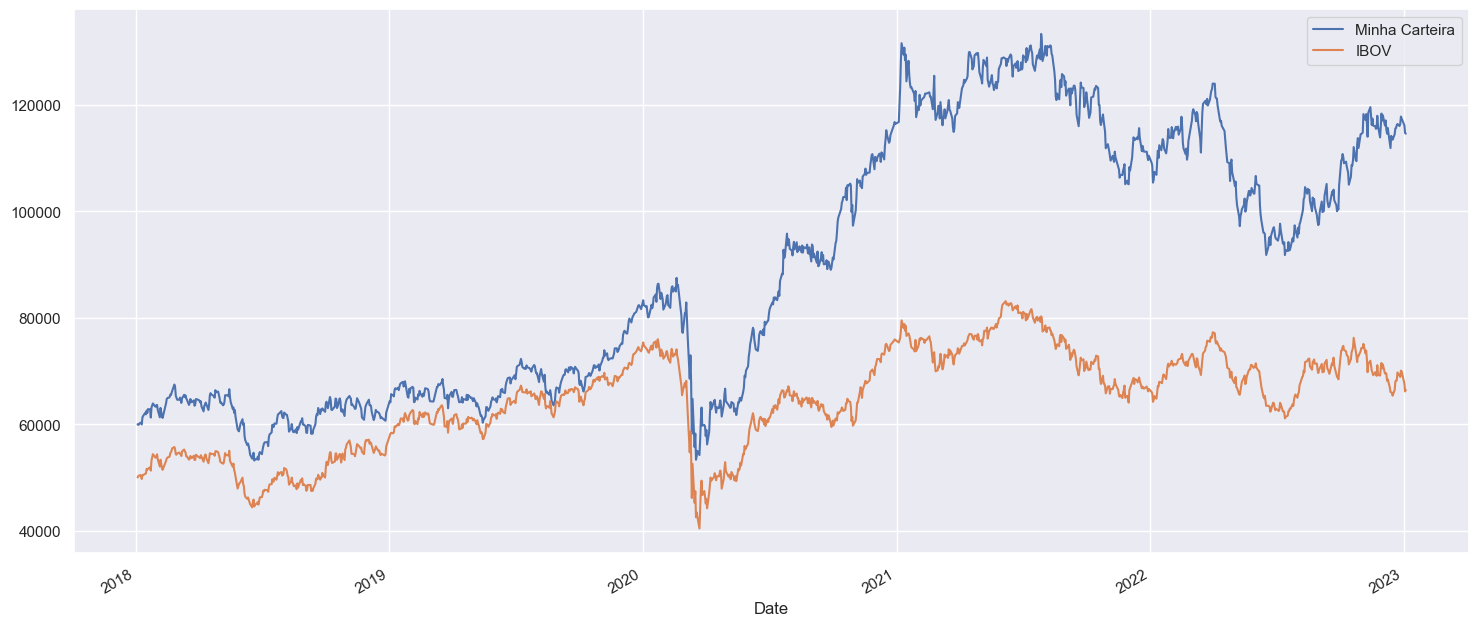

In [31]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend();

In [32]:
carteira_normalizada.describe()

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP,saldo
count,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000
mean,8157.349120,12421.608827,11045.547668,18733.940619,25956.325503,12917.475525,89232.247262
std,1103.362104,1431.078480,4054.068233,7321.713341,13656.338963,1824.281105,24529.883956
min,5406.734557,8564.819848,3703.796484,8746.788911,8151.123621,8082.952942,53173.202551
25%,7578.172732,11468.416215,8262.409821,12479.135930,10397.463522,11688.239857,64997.944182
50%,8129.135680,12425.235688,9602.984037,15031.138800,27658.047727,13142.522919,85707.165195
75%,8787.596912,13429.744987,13674.243592,25376.939197,38579.538114,14335.321118,113538.521021
max,11261.632058,16016.957783,23321.412263,33404.705692,51196.592444,16628.224853,133376.389935
